In [241]:
import pandas as pd
import numpy as np

In [242]:
df = pd.read_csv('Churn_Modelling.csv')

In [243]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [244]:
df.shape

(10000, 14)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [246]:
df.duplicated().sum()

0

In [247]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [248]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [249]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [250]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [251]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [252]:
#One-Hot Encode Geography and Gender using pandas library
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [253]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

In [254]:
#we scale the values because if we do not scale the values the neural network does not converge

In [255]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

In [256]:
df.shape

(10000, 12)

In [257]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

In [259]:
X_train.shape

(8000, 11)

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [261]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [262]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [263]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [264]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [266]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7079 - loss: 0.6067 - val_accuracy: 0.8000 - val_loss: 0.4760
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8032 - loss: 0.4547 - val_accuracy: 0.8100 - val_loss: 0.4474
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4369 - val_accuracy: 0.8175 - val_loss: 0.4372
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4266 - val_accuracy: 0.8225 - val_loss: 0.4317
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.4265 - val_accuracy: 0.8175 - val_loss: 0.4259
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.4083 - val_accuracy: 0.8194 - val_loss: 0.4232
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4127 - val_accuracy: 0.8238 - val_loss: 0.4200
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8295 - loss: 0.4166 - val_accu

In [267]:
model.layers[0].get_weights() #we got the weights and bias for the first layer(between the input layer and the first layer)

[array([[ 0.34020367, -0.06304935,  0.39885983,  0.27327734, -0.05120581,
          0.7699034 , -0.19965835,  0.00753788, -0.10398733,  0.19696265,
          0.03608312],
        [ 0.4809875 ,  0.3316758 , -0.5809156 , -0.4563997 ,  0.4973147 ,
         -0.16761366,  0.18200547,  1.1099876 , -0.37218705, -0.7339972 ,
         -0.40530246],
        [ 0.21848351, -0.1211512 , -0.11146811,  0.08370488,  0.37191433,
         -0.5864352 , -0.5772464 , -0.11397245,  0.05364067, -0.25206217,
         -0.15038952],
        [-0.37768584,  0.2890692 ,  0.3223779 ,  0.13933879, -0.0159731 ,
          0.35612252,  0.01717997, -0.10752507, -0.10517871, -0.23184983,
          0.0858938 ],
        [-0.6302842 ,  1.2299067 ,  0.6503057 ,  0.2562782 ,  1.3059752 ,
         -0.00541748, -0.13825025, -0.26244178,  0.20717216,  0.14885458,
          0.5213934 ],
        [ 0.0528794 , -0.06217568,  0.09217988,  0.7032051 ,  0.04226986,
          0.20550984, -0.6689919 , -0.01709499,  0.50479555,  0.0901024

In [268]:
model.layers[1].get_weights() #we got the weights and bias for the second layer(between the first layer and the second layer)

[array([[-0.11176669,  0.5754701 ,  0.17540321,  0.29354954, -0.11449327,
          0.305731  ,  0.84758425,  0.13216151,  0.12221434,  0.02936679,
          0.08931766],
        [ 0.8691115 ,  0.43178537, -0.14037721, -0.42219228, -0.07843176,
         -0.75449556, -0.3347652 , -0.4864044 , -0.02533738,  0.1939283 ,
         -0.53883785],
        [ 0.6177553 ,  0.07180927,  0.23279253,  0.08139406,  0.20391805,
         -0.6266482 , -0.276642  , -0.05845641, -0.32290044, -0.04049409,
         -0.4767384 ],
        [ 0.02987626, -0.0231744 ,  0.0743807 , -0.8216403 ,  0.331729  ,
          0.03276187,  0.07904105, -0.1362307 ,  0.29237175,  0.10319879,
          0.25649875],
        [ 0.6034441 ,  0.304818  , -0.02934017, -0.47479567, -0.29954365,
          0.8791626 , -0.2247221 ,  0.38735625, -0.13144122,  0.4229901 ,
          0.671974  ],
        [ 0.14292382,  0.27769032,  0.32125866, -0.6621298 , -0.52962935,
          0.20936237,  0.34980547,  0.13831668,  0.5851181 ,  0.0441058

In [269]:
model.layers[2].get_weights() #we got the weights and bias for the third layer(between the second layer and the output layer)

[array([[ 1.3290342 ],
        [ 1.6452969 ],
        [-0.70647126],
        [ 1.1094159 ],
        [-0.76020294],
        [-0.5202878 ],
        [ 0.80602837],
        [-0.11696599],
        [-0.6445903 ],
        [-0.71453553],
        [-0.7563836 ]], dtype=float32),
 array([-0.0519123], dtype=float32)]

In [270]:
y_log = model.predict(X_test_scaled) #the value is not 1 or 0 it is a probability because we are using sigmoid 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [271]:
y_pred = np.where(y_log>0.5,1,0) #we set a threshold of 0.5, if greater than 0.5 then 1 and less than 0.5 means 0

In [272]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8575

In [273]:
import matplotlib.pyplot as plt

In [274]:
history.history

{'accuracy': [0.7682812213897705,
  0.8018749952316284,
  0.8045312762260437,
  0.8129687309265137,
  0.8167187571525574,
  0.8254687786102295,
  0.828125,
  0.83203125,
  0.8343750238418579,
  0.8348437547683716,
  0.836718738079071,
  0.8353124856948853,
  0.8368750214576721,
  0.8376562595367432,
  0.8392187356948853,
  0.8407812714576721,
  0.84375,
  0.844531238079071,
  0.8485937714576721,
  0.8510937690734863,
  0.8537499904632568,
  0.8578125238418579,
  0.8581249713897705,
  0.8596875071525574,
  0.8592187762260437,
  0.8603125214576721,
  0.860156238079071,
  0.8635937571525574,
  0.8621875047683716,
  0.8628125190734863,
  0.8635937571525574,
  0.8621875047683716,
  0.8639062643051147,
  0.8628125190734863,
  0.8645312786102295,
  0.8651562333106995,
  0.8646875023841858,
  0.8645312786102295,
  0.864062488079071,
  0.8659374713897705,
  0.8648437261581421,
  0.8660937547683716,
  0.8665624856948853,
  0.8665624856948853,
  0.8656250238418579,
  0.8665624856948853,
  0.86671

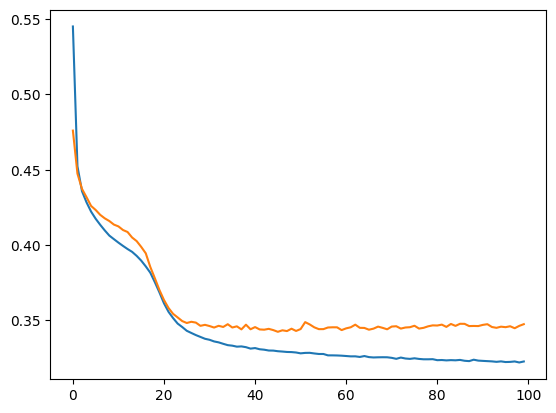

In [275]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

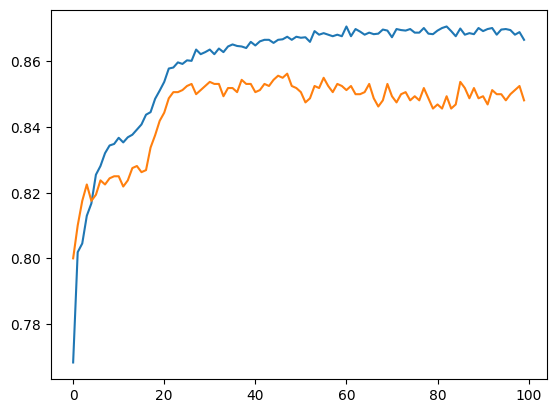

In [277]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])